### DATA PREPROCESSING


In [18]:
# importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from wordcloud import WordCloud
import re
from matplotlib import cm


import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading and loading the data into a dataframe
train_data = pd.read_csv("twitter_training.csv")
validation_data = pd.read_csv("twitter_validation.csv")
df = pd.concat([train_data, validation_data], ignore_index = True)
df.head()


,ID,Game,Label,Text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [25]:
#previewing the data
df.tail()

,ID,Game,Label,Text
75670,7516,LeagueOfLegends,Neutral,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
75671,5708,HomeDepot,Positive,Thank you to Matching funds Home Depot RW paym...
75673,2165,CallOfDuty,Neutral,Late night stream with the boys! Come watch so...
75677,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75678,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...


In [4]:
# checking for missing values
df.isna().sum()

ID         0
Game       0
Label      0
Text     686
dtype: int64

In [5]:
#dropping missing values
df.dropna(inplace = True)

In [6]:
# checking to see if there areany more missing values
df.isna().sum()

ID       0
Game     0
Label    0
Text     0
dtype: int64

There aren't any other missing values within the dataset

In [7]:
df['Label'].value_counts()

Negative      22624
Positive      20932
Neutral       18393
Irrelevant    13047
Name: Label, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74996 entries, 0 to 75681
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      74996 non-null  int64 
 1   Game    74996 non-null  object
 2   Label   74996 non-null  object
 3   Text    74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


Most of the columns within the dataset are categorical, only the column ID is numerical which isn't really relevant for exploration

In [9]:
df.shape

(74996, 4)

The dataset has 4 columns and 74996 rows

In [10]:
# checking for duplicate values
df.duplicated().sum()

2858

In [11]:
# dropping the duplicate values
df.drop_duplicates(inplace = True)

In [24]:
df.duplicated().sum()

0

There aren't any other duplicates within the dataset

### EXPLORATORY DATA ANALYSIS


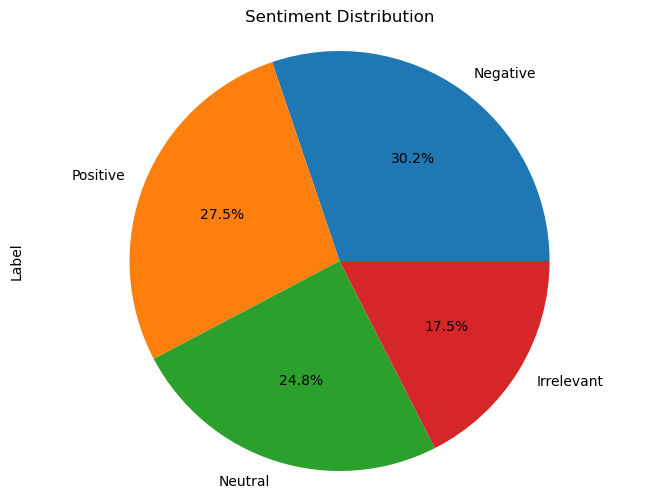

In [12]:
#Count of sentiments
# Create a pie chart
sentiments = df['Label'].value_counts()
plt.figure(figsize=(8, 6))
sentiments.plot(kind = 'pie', autopct='%1.1f%%')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.title('Sentiment Distribution')
plt.show()

Most of the tweets within the dataset were negative followed by positive and the least was irrelevant


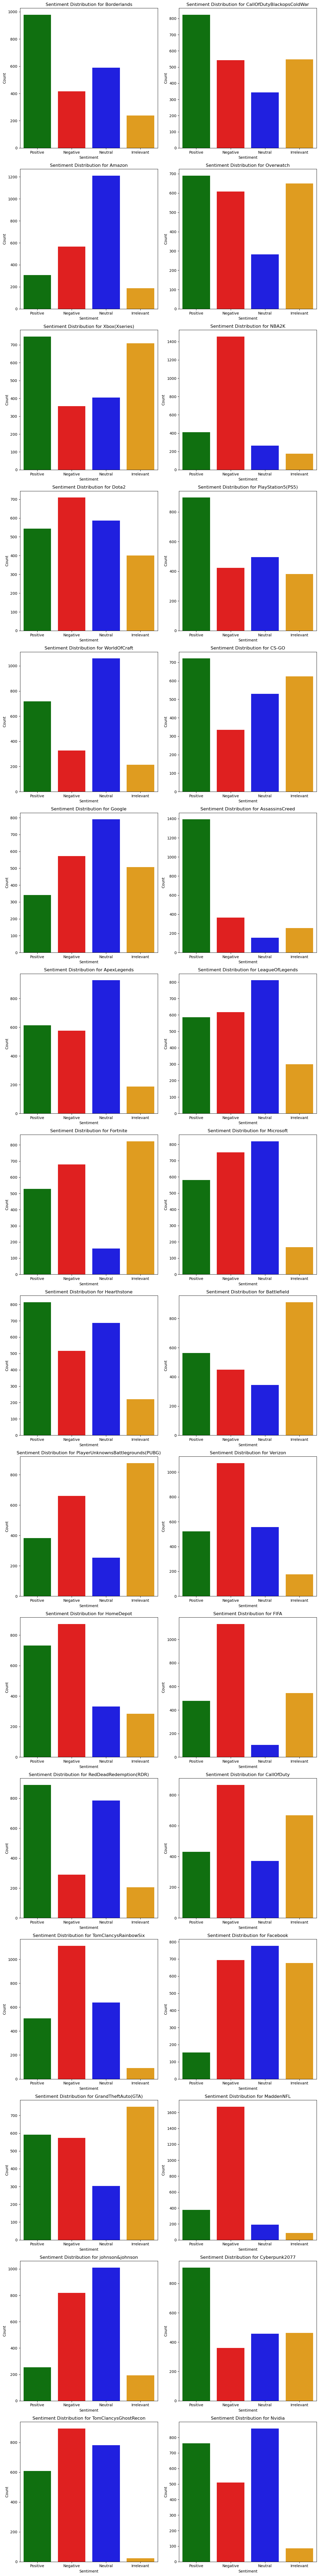

In [13]:
# Set up the number of games and subplots
games = df['Game'].unique()  # Get unique games
num_games = len(games)  # Count of unique games

# Define a color palette for the sentiments
palette = {'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue', 'Irrelevant': 'orange'}

# Specify the order of sentiments
sentiment_order = ['Positive', 'Negative', 'Neutral', 'Irrelevant']

# Create subplots
fig, axes = plt.subplots(nrows=(num_games + 1) // 2, ncols=2, figsize=(12, 6 * ((num_games + 1) // 2)))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate through each game and plot sentiment distribution
for i, game in enumerate(games):
    sns.countplot(x='Label', data=df[df['Game'] == game], ax=axes[i], palette = palette, order = sentiment_order)
    axes[i].set_title(f'Sentiment Distribution for {game}')
    axes[i].set_xlabel('Sentiment')
    axes[i].set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

The above plots show the distribution of sentiments per game

#### FURTHER EXPLORATION.


In [14]:
# extracting the positive tweets
positive_tweets = df[df['Label'] == 'Positive']['Text']

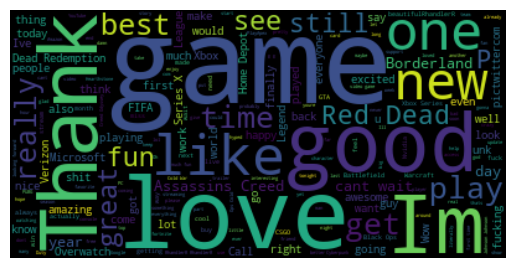

In [16]:
# Clean the text
positive_text = " ".join(tweet for tweet in positive_tweets)
positive_text = re.sub(r'http\S+', '', positive_text)  # Remove URLs
positive_text = re.sub(r'[^A-Za-z\s]', '', positive_text)  # Remove special characters

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords.words('english')).generate(positive_text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above word cloud shows the words within the positive tweets ranging from the most common to the least common. Most of the words within the posituve tweets are courteous 

In [17]:
# Extracting the negative tweets
Negative_tweets = df[df['Label'] == 'Negative']['Text']

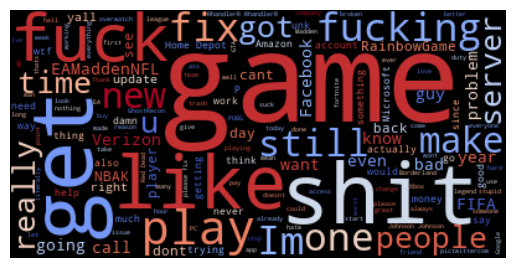

In [19]:
# Clean the text
negative_text = " ".join(tweet for tweet in Negative_tweets)
negative_text = re.sub(r'http\S+', '', negative_text)  # Remove URLs
negative_text = re.sub(r'[^A-Za-z\s]', '', negative_text)  # Remove special characters

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords.words('english'),colormap=cm.coolwarm).generate(negative_text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above word cloud shows the words within the negative tweets from the most common to the least common. The most common words within the negative tweets are curse words

In [20]:
# extracting the neutral tweets
Neutral_tweets = df[df['Label'] == 'Neutral']['Text']

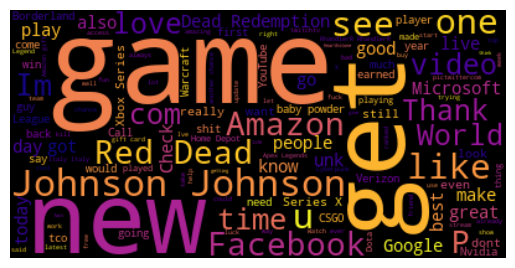

In [23]:
# Clean the text
neutral_text = " ".join(tweet for tweet in Neutral_tweets)
neutral_text = re.sub(r'http\S+', '', neutral_text)  # Remove URLs
neutral_text = re.sub(r'[^A-Za-z\s]', '', neutral_text)  # Remove special characters

# Generate word cloud
wordcloud = WordCloud(stopwords=stopwords.words('english'),colormap=cm.plasma).generate(neutral_text)

# Plot the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The above word cloud shows the words withiin the neutral texts fromthe most common to the least common. The most common are just the names of the games.